In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [2]:
path = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))

In [3]:
path

'C:\\a-dev\\kuliah\\peng-cit'

In [4]:
tomato = cv2.imread(os.path.join(path, 'image', 'daun-tomat.jpg'))

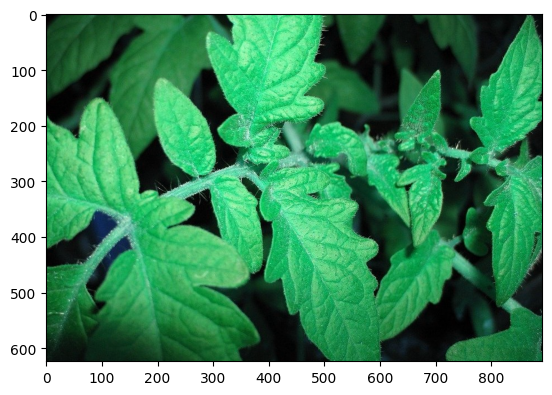

In [5]:
plt.imshow(tomato)

In [6]:
tomato_rgb = cv2.cvtColor(tomato, cv2.COLOR_BGR2RGB)

In [7]:
hist = cv2.calcHist([tomato], [0], None, [256], [0 ,256])

In [8]:
def plot_12(instance, histogram):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(instance)
    axs[1].plot(histogram)
    plt.show()

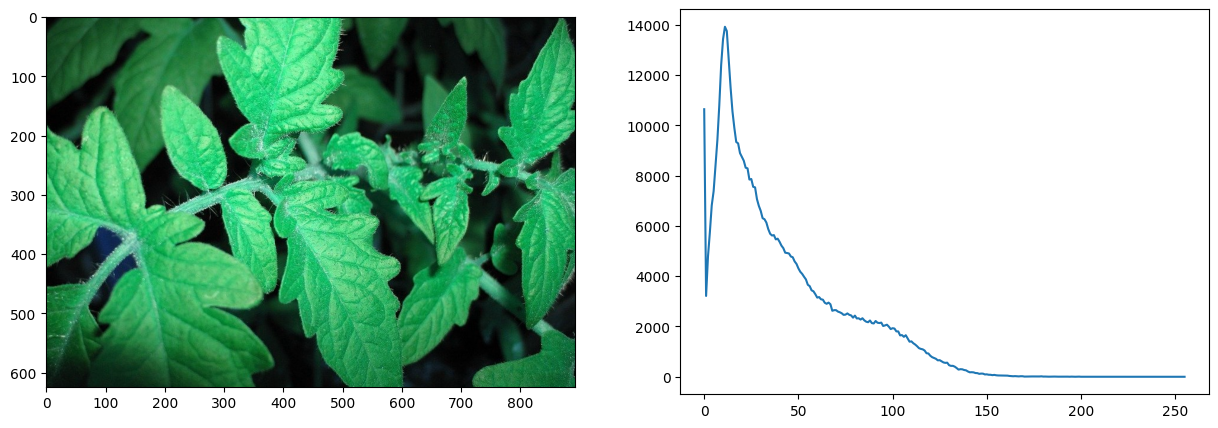

In [9]:
plot_12(tomato, hist)

In [10]:
def plot_22(instance, second_instance, size, args):
    fig, axs = plt.subplots(2, 2, figsize=size)
    axs[0, 0].imshow(instance)
    axs[0, 1].plot(args[0])

    axs[1, 0].imshow(second_instance)
    axs[1, 1].hist(args[1], 256, [0, 256], color=args[2])
    plt.show()

In [11]:
def plot_22_hist(instance, second_instance, size, color):
    fig, axs = plt.subplots(2, 2, figsize=(15, 5))
    axs[0, 0].imshow(instance)
    axs[0, 1].hist(instance.ravel(), 256, [0, 256], color=color[0])

    axs[1, 0].imshow(second_instance)
    axs[1, 1].hist(second_instance.ravel(), 256, [0, 256], color=color[1])
    plt.show()

### RGB dan BGR

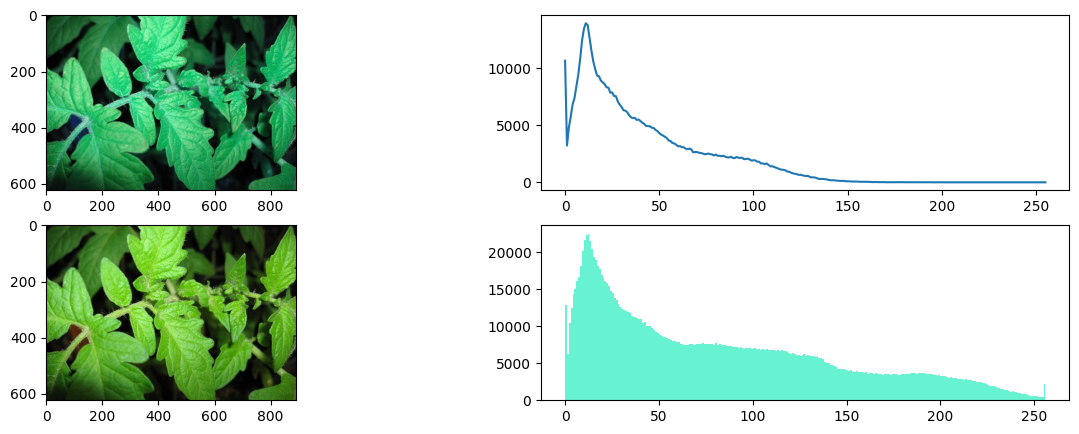

In [12]:
plot_22(tomato, tomato_rgb, (15, 5), [hist, tomato_rgb.ravel(), '#67f2d1'])

### RGB to GRAYSCALE

In [13]:
tomato_gray = cv2.imread(os.path.join(path, 'image', 'daun-tomat.jpg'), 0)
hist2 = cv2.equalizeHist(tomato_gray)
tomato_gray = cv2.cvtColor(tomato_gray, cv2.COLOR_BGR2RGB)

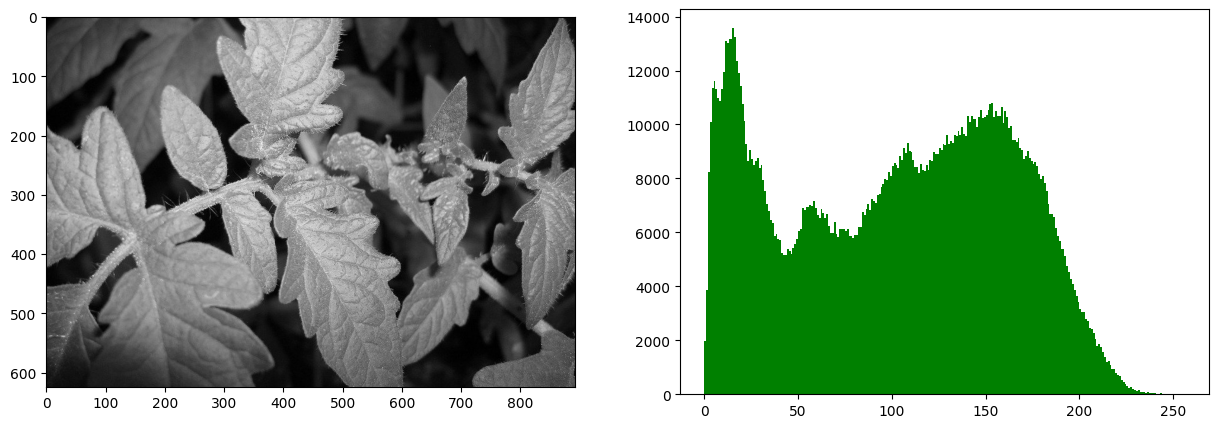

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(tomato_gray)
axs[1].hist(tomato_gray.ravel(), 256, [0, 256], color='g')
plt.show()

### menampilkan perbedaan antara RGB dan Grayscale

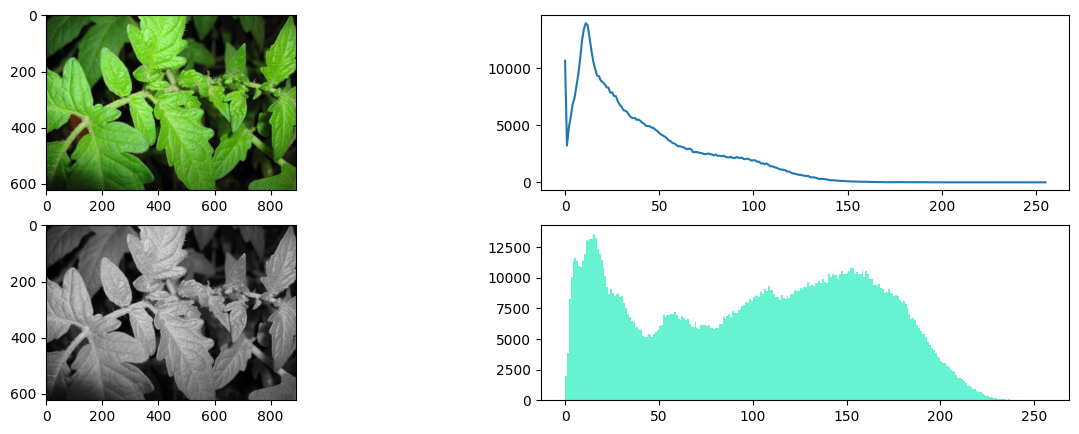

In [15]:
plot_22(tomato_rgb, tomato_gray, (15, 5), [hist, tomato_gray.ravel(), '#67f2d1'])

In [16]:
tomato.shape

(624, 892, 3)

In [17]:
row, col, channel = tomato.shape

### MENGUBAH KECERAHKAN

In [18]:
beta = 5
bright = np.zeros((row, col, channel))

for x in range(row):
    for y in range(col):
        temp = tomato_rgb[x, y] + beta
        bright[x, y] = temp

bright = bright.astype(np.uint8)

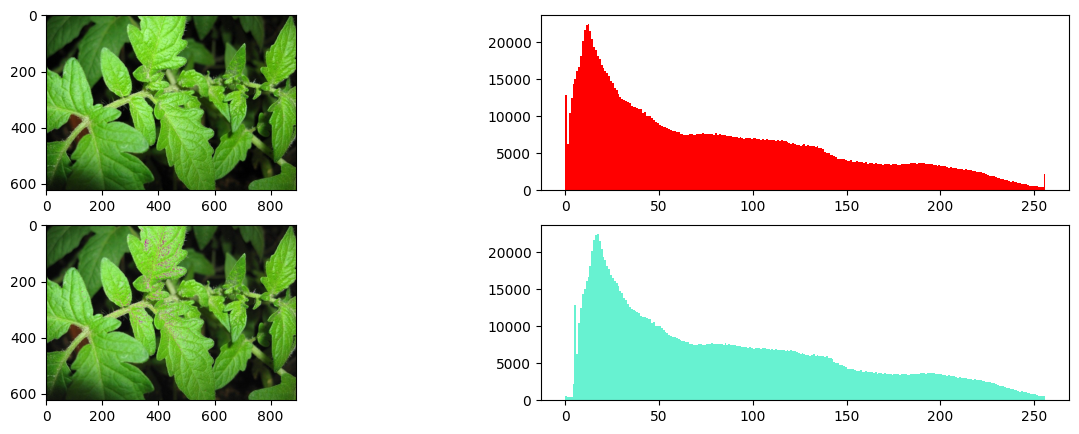

In [19]:
plot_22_hist(tomato_rgb, bright, (15, 5), ['red', '#67f2d1'])

### MENGUBAH KONTRAS

In [20]:
alpha = 1.01
contrast = np.zeros((row, col, 3))

for x in range(row):
    for y in range(col):
        gyx = alpha * tomato_rgb[x, y]
        contrast[x,y] = gyx

contrast = contrast.astype(np.uint8)

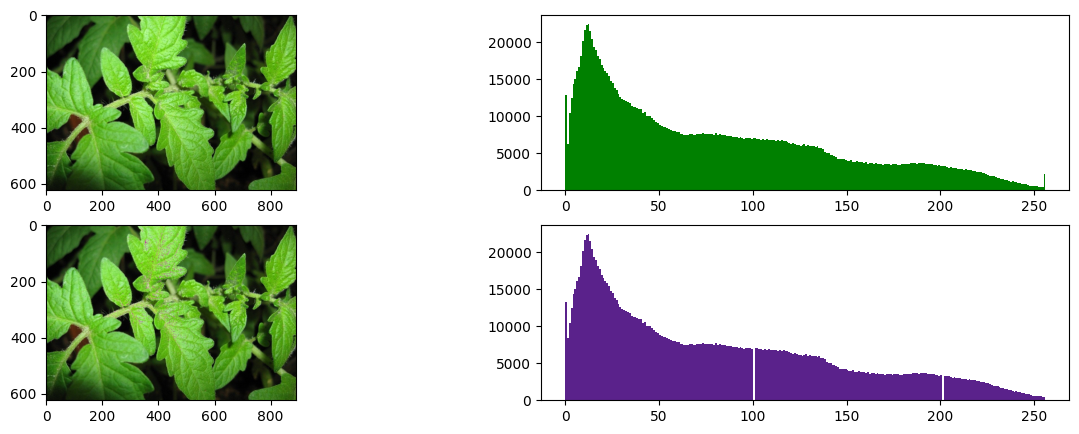

In [21]:
plot_22_hist(tomato_rgb, contrast, (15, 5), ['green', '#5a228b'])

### MENGGABUNGKAN KECERAHAN DAN KONTRAS

In [24]:
beta = 8
alpha = .9
result = np.zeros((row, col, 3))

for x in range(row):
    for y in range(col):
        gyx = alpha * tomato_rgb[x, y] + beta
        result[x,y] = gyx

result = result.astype(np.uint8)

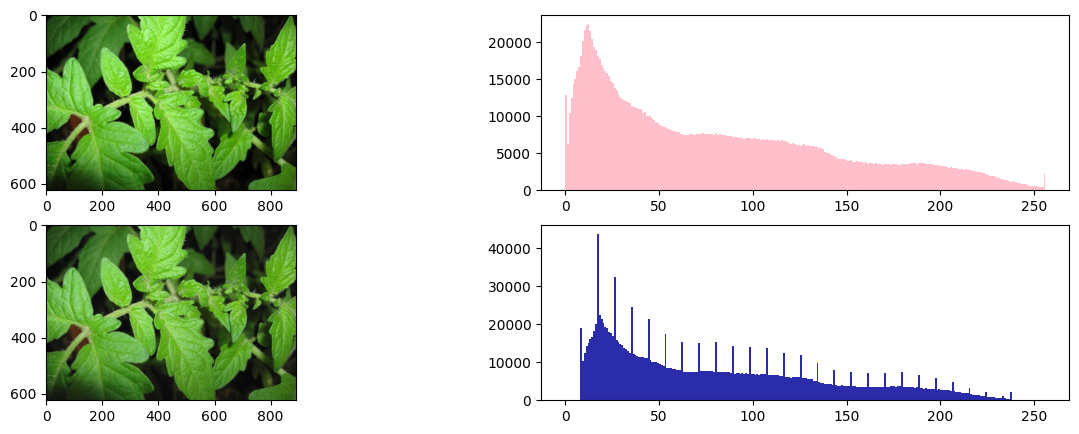

In [25]:
plot_22_hist(tomato_rgb, result, (15, 5), ['pink', '#2b2caa'])